In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid_new.csv')
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000


<AxesSubplot:ylabel='Density'>

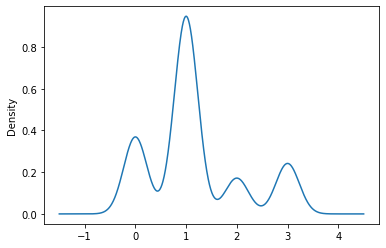

In [3]:
#data.loc[data.Energy_kWh > 3,'Energy_kWh'].plot.density()
data.loc[data.Energy_kWh > 3,'measure'].plot.density()

In [4]:
data_test = pd.read_csv(r'./charge0422_hourly_with_Covid_new.csv')

<AxesSubplot:ylabel='Density'>

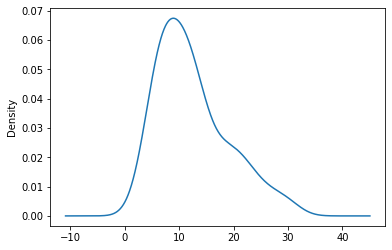

In [5]:
data_test.loc[data_test.Energy_kWh > 3, 'Energy_kWh'].plot.density()

## training set

In [6]:
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000


In [7]:
data['Energy_kWh_1'] = data['Energy_kWh'].shift(-1)
data['Energy_kWh_2'] = data['Energy_kWh'].shift(-2)
data['Energy_kWh_3'] = data['Energy_kWh'].shift(-3)
data['Energy_kWh_4'] = data['Energy_kWh'].shift(-4)
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0,NaN,NaN,NaN,0.560625,0.000000,0.000000,0.000558
1,2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0,4.214567,NaN,NaN,0.000000,0.000000,0.000558,0.000000
2,2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0,0.560625,4.214567,NaN,0.000000,0.000558,0.000000,0.000000
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567,0.000558,0.000000,0.000000,0.000000
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0,0.000000,0.000000,0.000925,0.000000,0.000000,0.000000,0.000000
10884,2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
10885,2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
10886,2022-02-28 23:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
data = data.iloc[3:-4]
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
3,2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567,0.000558,0.0,0.0,0.0
4,2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625,0.000000,0.0,0.0,0.0
5,2020-12-02 14:00:00,0.000000,2,14,NaN,False,3.0,0.000558,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,2020-12-02 15:00:00,0.000000,2,15,NaN,False,3.0,0.000000,0.000558,0.000000,0.000000,0.0,0.0,0.0
7,2020-12-02 16:00:00,0.000000,2,16,NaN,False,3.0,0.000000,0.000000,0.000558,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,2022-02-28 16:00:00,0.007133,0,16,Spring holiday,True,0.0,0.047292,0.000000,0.000000,0.000925,0.0,0.0,0.0
10880,2022-02-28 17:00:00,0.000925,0,17,Spring holiday,True,0.0,0.007133,0.047292,0.000000,0.000000,0.0,0.0,0.0
10881,2022-02-28 18:00:00,0.000000,0,18,Spring holiday,True,0.0,0.000925,0.007133,0.047292,0.000000,0.0,0.0,0.0
10882,2022-02-28 19:00:00,0.000000,0,19,Spring holiday,True,0.0,0.000000,0.000925,0.007133,0.000000,0.0,0.0,0.0


In [9]:
data.reset_index(inplace=True)

In [10]:
df = data.drop(['index', 'hols', 'Time'], axis=1)
df.loc[:, 'measure'] = df['measure'].astype(int)
df

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,0.000000,2,12,False,3,0.000000,0.560625,4.214567,0.000558,0.0,0.0,0.0
1,0.000558,2,13,False,3,0.000000,0.000000,0.560625,0.000000,0.0,0.0,0.0
2,0.000000,2,14,False,3,0.000558,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,2,15,False,3,0.000000,0.000558,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,2,16,False,3,0.000000,0.000000,0.000558,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10876,0.007133,0,16,True,0,0.047292,0.000000,0.000000,0.000925,0.0,0.0,0.0
10877,0.000925,0,17,True,0,0.007133,0.047292,0.000000,0.000000,0.0,0.0,0.0
10878,0.000000,0,18,True,0,0.000925,0.007133,0.047292,0.000000,0.0,0.0,0.0
10879,0.000000,0,19,True,0,0.000000,0.000925,0.007133,0.000000,0.0,0.0,0.0


<AxesSubplot:>

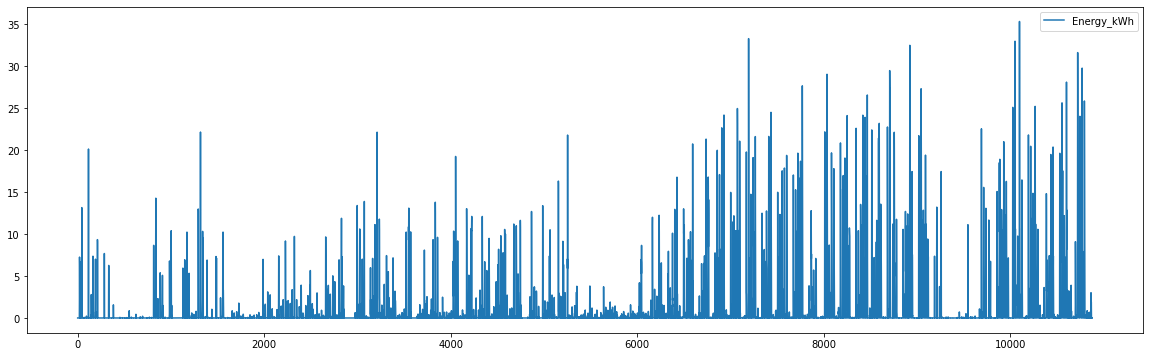

In [11]:
sample = df[['Energy_kWh']].copy()
#sample.loc[sample.Energy_kWh > 6,'Energy_kWh'] = 0
sample.plot(figsize=(20,6))
#sample

In [12]:
df.loc[df.Energy_kWh > 5, 'hour'].unique()

array([ 8,  9, 14, 10, 11,  7, 12, 13, 15, 16,  6, 17, 18, 19])

## test set

In [13]:
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2022-03-01 04:00:00,0.000000,1,4,Spring holiday,True,0,0.000000,0.000000,0.0
1,2022-03-01 05:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0
2,2022-03-01 06:00:00,0.044108,1,6,Spring holiday,True,0,0.000000,0.000000,0.0
3,2022-03-01 07:00:00,7.013325,1,7,Spring holiday,True,0,0.044108,0.000000,0.0
4,2022-03-01 08:00:00,7.089000,1,8,Spring holiday,True,0,7.013325,0.044108,0.0
...,...,...,...,...,...,...,...,...,...,...
647,2022-03-28 03:00:00,0.000000,0,3,NaN,False,0,0.000000,0.000000,0.0
648,2022-03-28 04:00:00,0.000000,0,4,NaN,False,0,0.000000,0.000000,0.0
649,2022-03-28 05:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0
650,2022-03-28 06:00:00,15.496425,0,6,NaN,False,0,0.000000,0.000000,0.0


In [14]:
data_test['Energy_kWh_1'] = data_test['Energy_kWh'].shift(-1)
data_test['Energy_kWh_2'] = data_test['Energy_kWh'].shift(-2)
data_test['Energy_kWh_3'] = data_test['Energy_kWh'].shift(-3)
data_test['Energy_kWh_4'] = data_test['Energy_kWh'].shift(-4)
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2022-03-01 04:00:00,0.000000,1,4,Spring holiday,True,0,0.000000,0.000000,0.0,0.000000,0.044108,7.013325,7.089000
1,2022-03-01 05:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0,0.044108,7.013325,7.089000,7.154083
2,2022-03-01 06:00:00,0.044108,1,6,Spring holiday,True,0,0.000000,0.000000,0.0,7.013325,7.089000,7.154083,6.869500
3,2022-03-01 07:00:00,7.013325,1,7,Spring holiday,True,0,0.044108,0.000000,0.0,7.089000,7.154083,6.869500,1.168642
4,2022-03-01 08:00:00,7.089000,1,8,Spring holiday,True,0,7.013325,0.044108,0.0,7.154083,6.869500,1.168642,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,2022-03-28 03:00:00,0.000000,0,3,NaN,False,0,0.000000,0.000000,0.0,0.000000,0.000000,15.496425,28.914517
648,2022-03-28 04:00:00,0.000000,0,4,NaN,False,0,0.000000,0.000000,0.0,0.000000,15.496425,28.914517,NaN
649,2022-03-28 05:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0,15.496425,28.914517,NaN,NaN
650,2022-03-28 06:00:00,15.496425,0,6,NaN,False,0,0.000000,0.000000,0.0,28.914517,NaN,NaN,NaN


In [15]:
data_test = data_test.iloc[:-4]
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,2022-03-01 04:00:00,0.000000,1,4,Spring holiday,True,0,0.000000,0.000000,0.0,0.000000,0.044108,7.013325,7.089000
1,2022-03-01 05:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0,0.044108,7.013325,7.089000,7.154083
2,2022-03-01 06:00:00,0.044108,1,6,Spring holiday,True,0,0.000000,0.000000,0.0,7.013325,7.089000,7.154083,6.869500
3,2022-03-01 07:00:00,7.013325,1,7,Spring holiday,True,0,0.044108,0.000000,0.0,7.089000,7.154083,6.869500,1.168642
4,2022-03-01 08:00:00,7.089000,1,8,Spring holiday,True,0,7.013325,0.044108,0.0,7.154083,6.869500,1.168642,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2022-03-27 23:00:00,0.000000,6,23,NaN,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
644,2022-03-28 00:00:00,0.000000,0,0,NaN,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
645,2022-03-28 01:00:00,0.000000,0,1,NaN,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
646,2022-03-28 02:00:00,0.000000,0,2,NaN,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,15.496425


In [17]:
df_test = data_test.drop(['hols', 'Time'], axis=1)
df_test.loc[:, 'measure'] = df_test['measure'].astype(int)
df_test

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
0,0.000000,1,4,True,0,0.000000,0.000000,0.0,0.000000,0.044108,7.013325,7.089000
1,0.000000,1,5,True,0,0.000000,0.000000,0.0,0.044108,7.013325,7.089000,7.154083
2,0.044108,1,6,True,0,0.000000,0.000000,0.0,7.013325,7.089000,7.154083,6.869500
3,7.013325,1,7,True,0,0.044108,0.000000,0.0,7.089000,7.154083,6.869500,1.168642
4,7.089000,1,8,True,0,7.013325,0.044108,0.0,7.154083,6.869500,1.168642,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.000000,6,23,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
644,0.000000,0,0,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
645,0.000000,0,1,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
646,0.000000,0,2,False,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,15.496425


# Multi-point forecasting model based on fastai Tabular Learner (FNN)

In [18]:
# Custom loss for multi-point forecasting

def multiPointLoss(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score


In [19]:
cont_df,cat_df = cont_cat_split(df, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [20]:
cont_df

['E_1', 'E_2', 'E_3']

In [21]:
cat_df

['weekday', 'hour', 'is_hol', 'measure']

In [22]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.2)(range_of(df))
to_nn = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [23]:
dls = to_nn.dataloaders(150)

In [24]:
from fastai.tabular.all import*

In [25]:
learn = tabular_learner(dls, wd=0.02, y_range=(0, 36), layers=[1000,500], n_out=5, loss_func=multiPointLoss)

SuggestedLRs(valley=0.001737800776027143)

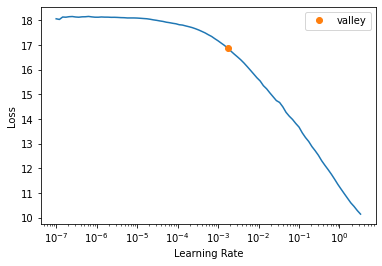

In [26]:
learn.lr_find()

In [27]:
learn.fine_tune(25, 2e-3)

epoch,train_loss,valid_loss,time
0,11.979115,7.851602,00:03


epoch,train_loss,valid_loss,time
0,7.024632,7.160014,00:03
1,6.684105,6.389182,00:03
2,6.354196,5.501590,00:03
3,5.800896,4.977168,00:03
4,5.552267,6.309558,00:03
5,5.421831,5.091257,00:03
6,4.949906,4.135285,00:03
7,3.867032,3.029177,00:03
8,3.268551,3.075335,00:03
9,3.078046,2.826489,00:03


In [28]:
torch.save(learn, "models/FNN_multipoint_new.pth")

In [29]:
learn.eval()

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(8, 5)
    (1): Embedding(25, 10)
    (2): Embedding(3, 3)
    (3): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=25, out_features=1000, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=1000, out_features=500, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=500, out_features=5, bias=True)
    )
    (3): SigmoidRange(low=0, high=36)
  )
)

In [30]:
cont_df_test,cat_df_test = cont_cat_split(df_test, max_card = 25, dep_var = ['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [31]:
procs_nn = [Categorify, Normalize]
to_test = TabularPandas(df_test, procs_nn, cat_df_test, cont_df_test, y_names=['Energy_kWh', 'Energy_kWh_1', 'Energy_kWh_2', 'Energy_kWh_3', 'Energy_kWh_4'])

In [32]:
dls_test = to_test.dataloaders()

In [62]:
preds,targs = learn.get_preds(dl=dls_test[0])

In [63]:
multiPointLoss(targs, preds)

tensor(4.4949)

In [49]:
preds.shape

torch.Size([648, 5])

In [50]:
preds.shape

torch.Size([648, 5])

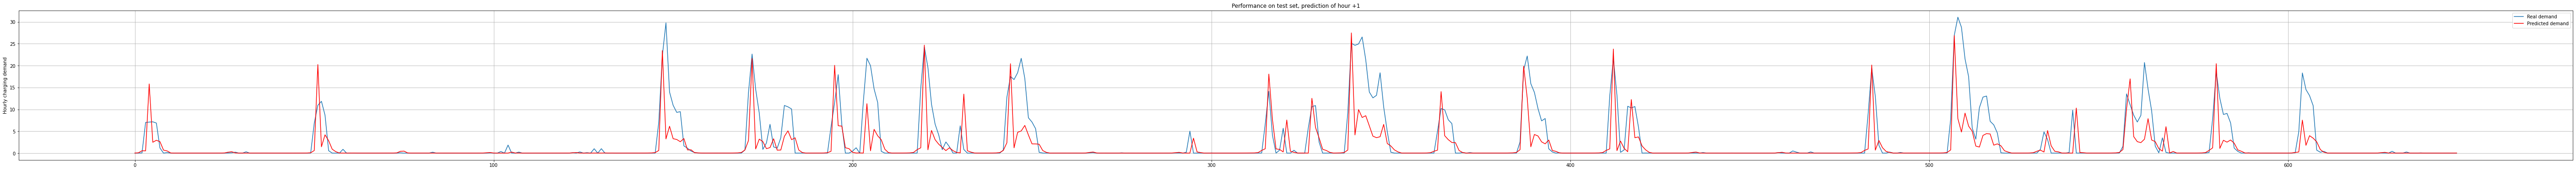

In [51]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Performance on test set, prediction of hour +1')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

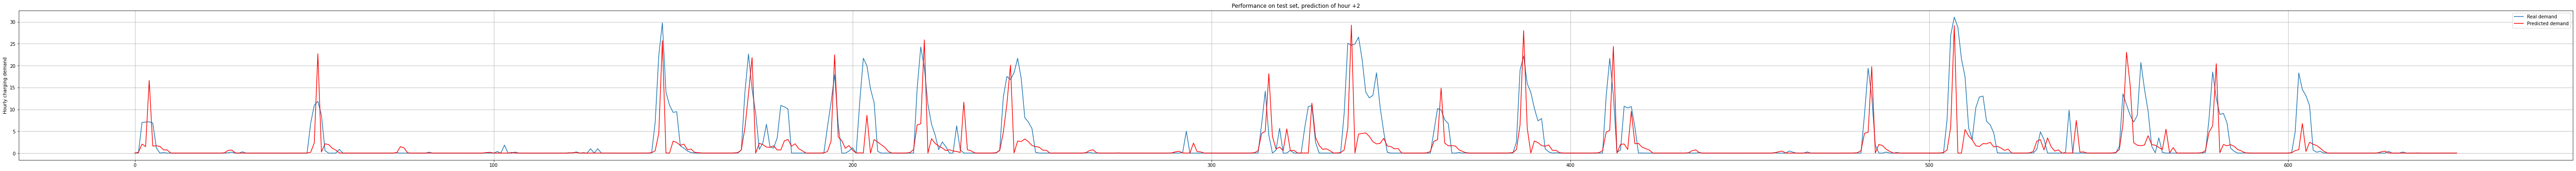

In [52]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,1])
plt.plot(range(len(preds)), preds[:,1], 'r')
plt.title('Performance on test set, prediction of hour +2')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

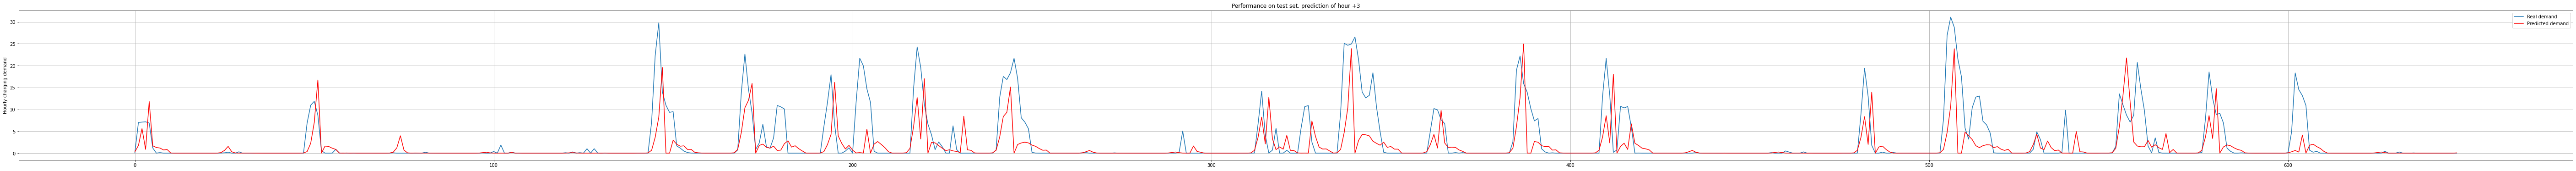

In [53]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,2])
plt.plot(range(len(preds)), preds[:,2], 'r')
plt.title('Performance on test set, prediction of hour +3')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

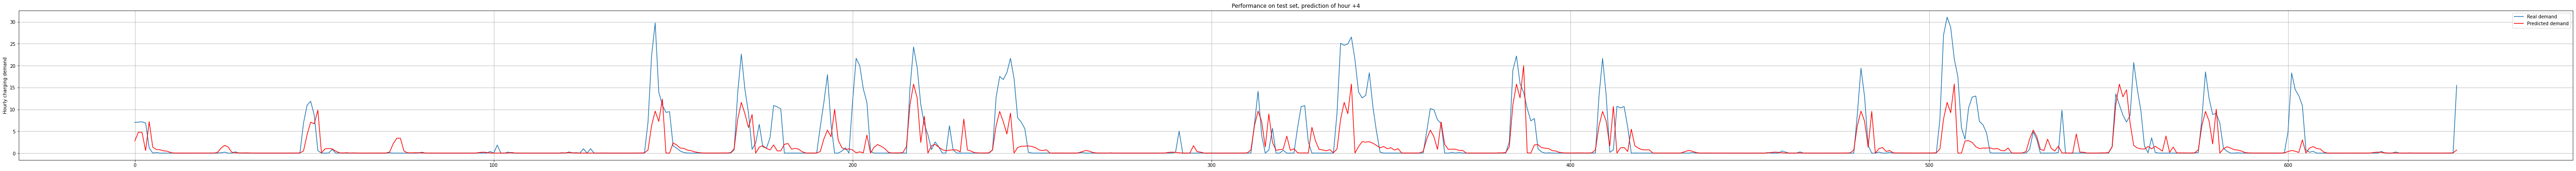

In [54]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,3])
plt.plot(range(len(preds)), preds[:,3], 'r')
plt.title('Performance on test set, prediction of hour +4')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

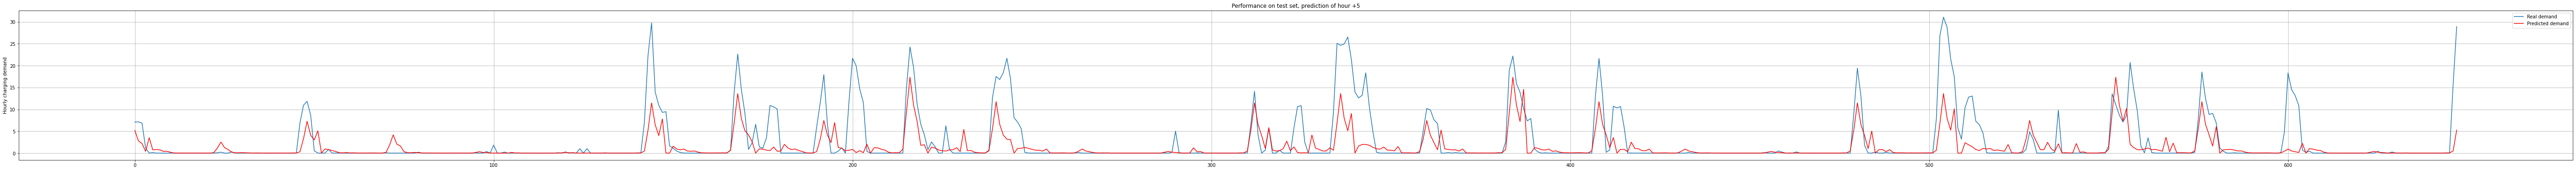

In [55]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,4])
plt.plot(range(len(preds)), preds[:,4], 'r')
plt.title('Performance on test set, prediction of hour +5')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()

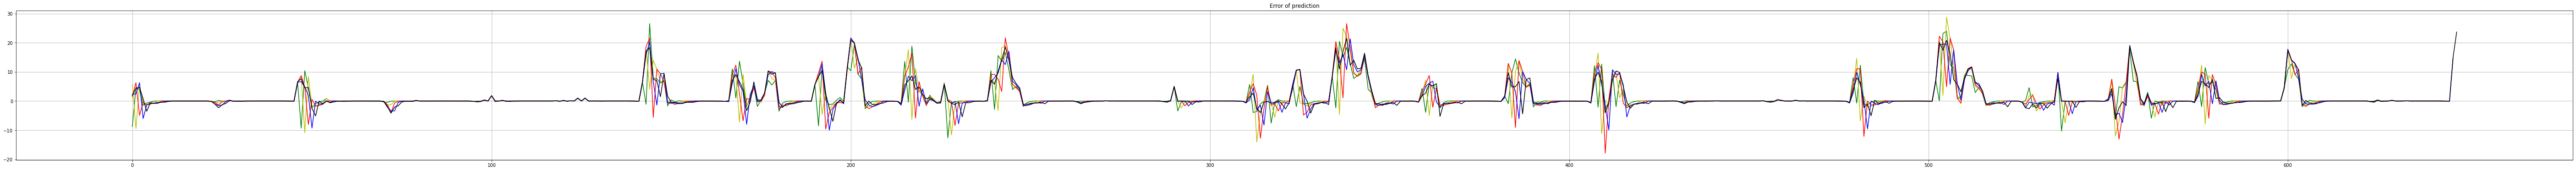

In [56]:
plt.figure(figsize=(100,6))
plt.plot(range(len(preds)-4), targs[4:,0] - preds[4:,0], 'g')
plt.plot(range(len(preds)-3), targs[3:,1] - preds[3:,1], 'y')
plt.plot(range(len(preds)-2), targs[2:,2] - preds[2:,2], 'r')
plt.plot(range(len(preds)-1), targs[1:,3] - preds[1:,3], 'b')
plt.plot(range(len(preds)), targs[:,4] - preds[:,4], 'k')
plt.title('Error of prediction')
plt.grid()
plt.show()

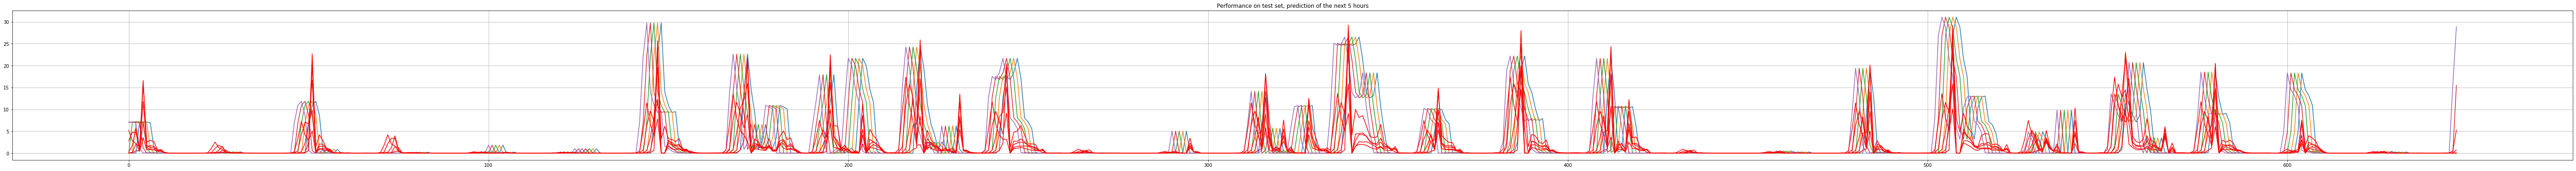

In [57]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,:])
plt.plot(range(len(preds)), preds[:,:], 'r')
plt.title('Performance on test set, prediction of the next 5 hours')
plt.grid()
plt.show()

In [58]:
preds,targs = learn.get_preds()

In [59]:
dls.valid.items

,Energy_kWh,weekday,hour,is_hol,measure,E_1,E_2,E_3,Energy_kWh_1,Energy_kWh_2,Energy_kWh_3,Energy_kWh_4
2926,0.000000,6,11,1,4,-0.297429,-0.299714,-0.298483,0.000000,0.000000,0.000000,0.000000
8660,0.005683,7,9,1,2,-0.297004,-0.299714,-0.298483,0.117775,0.000000,0.043000,0.000000
7359,0.000000,2,4,1,2,-0.297429,-0.299714,-0.298483,0.000000,0.002550,2.466500,8.149633
7592,0.000000,4,21,1,2,-0.297429,-0.299714,-0.298483,0.000000,0.000000,0.000000,0.000000
4706,5.674917,3,15,1,2,2.524582,3.022157,2.831733,0.000000,0.000000,0.000000,0.059692
...,...,...,...,...,...,...,...,...,...,...,...,...
9731,0.000000,2,24,1,2,-0.297429,-0.299714,-0.298483,0.000000,0.000000,0.000000,0.000000
8635,0.000000,6,8,1,2,-0.297429,-0.299714,-0.298483,0.018550,0.000000,0.000000,0.000000
6499,10.065858,1,8,1,3,3.606837,0.579458,-0.298483,10.528750,8.331767,0.980033,0.733483
4381,0.000000,4,2,1,3,-0.297429,-0.299714,-0.298483,0.000000,0.007325,0.034500,0.000000


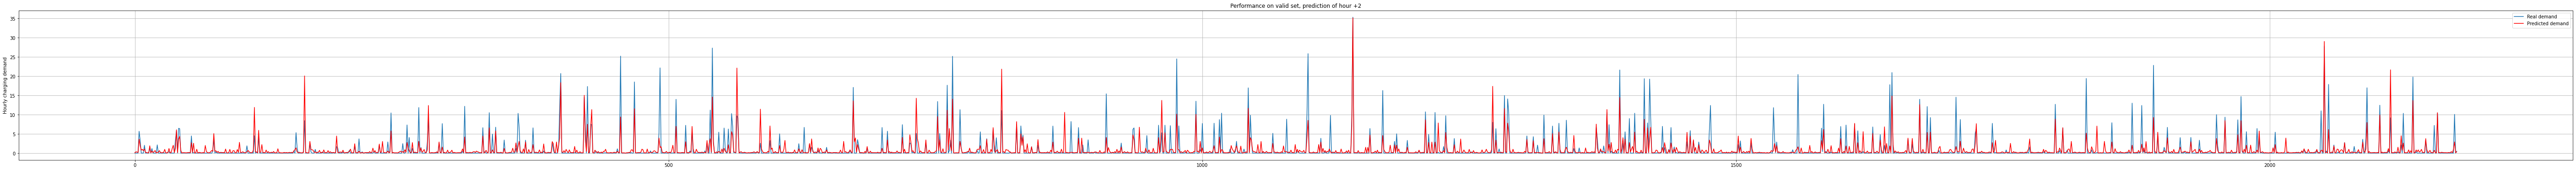

In [60]:
plt.figure(figsize=(100,6))
plt.plot(range(len(targs)), targs[:,0])
plt.plot(range(len(preds)), preds[:,0], 'r')
plt.title('Performance on valid set, prediction of hour +2')
plt.ylabel('Hourly charging demand')
plt.legend(['Real demand', 'Predicted demand'])
plt.grid()
plt.show()